## Problem Statement

The objective of this project is to predict medical insurance charges 
based on personal attributes such as age, sex, BMI, number of children, 
smoking status, and region.

Since the target variable (charges) is continuous, 
this problem is treated as a supervised regression problem.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape


(1338, 7)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Basic Data Understanding

The dataset contains both numerical and categorical features.

Numerical Features:
- age
- bmi
- children
- charges

Categorical Features:
- sex
- smoker
- region

Target Variable: charges (continuous)


In [7]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df.duplicated().sum()


np.int64(1)

In [9]:
df = df.drop_duplicates()
df.duplicated().sum()


np.int64(0)

## Data Cleaning

The dataset was checked for missing values and duplicate records.
No missing values were found.
Duplicate rows were removed.


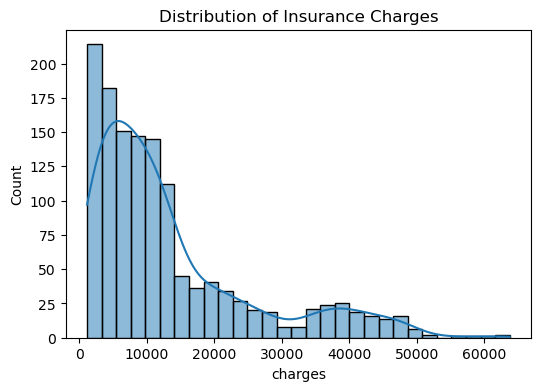

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df["charges"], kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()


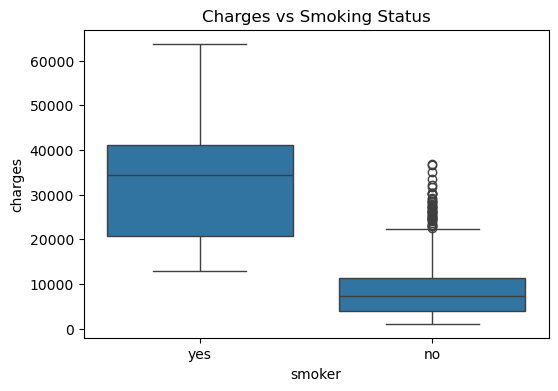

In [11]:
plt.figure(figsize=(6,4))
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges vs Smoking Status")
plt.show()


## EDA Observations

Smokers have significantly higher insurance charges compared to non-smokers.
Charges are right-skewed.


In [12]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


## Feature Encoding

Categorical variables were converted into numerical form 
using One-Hot Encoding.


In [13]:
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop("charges", axis=1)
y = df_encoded["charges"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [15]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 4177.0455610363215
MSE: 35478020.67523558
RMSE: 5956.342894363585
R2 Score: 0.8069287081198013


## Inference on Unseen Data

Here, the trained regression model is tested on unseen data.
The predicted value is compared with the actual value.


In [18]:
# Take one unseen sample
sample_input = X_test[0].reshape(1, -1)

# Predict
predicted_charge = lr_model.predict(sample_input)

print("Predicted Insurance Charge:", predicted_charge[0])
print("Actual Insurance Charge:", y_test.iloc[0])


Predicted Insurance Charge: 8143.693884116424
Actual Insurance Charge: 8688.85885


## Conclusion

The Linear Regression model successfully predicts medical insurance charges.
Smoking status has the strongest influence on cost.
The model performance is evaluated using MAE, RMSE, and R2 score.
